In [1]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format

# 시각화 라이브러리
import matplotlib.pyplot as plt
from pylab import cm

# 한글 폰트 문제
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 모델 관련
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# 클러스터링
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


#### 데이터 프레임 전처리

##### 1. city(그룹화 X) - 지역, 나이 제외 클러스터링

In [56]:
# city - 지역, 나이 그룹화 X
city = pd.read_csv('./dataset/credit_card_dataset_city.csv', encoding='utf-8')

city['city_ages'] = city['city'] + ' ' +city['ages']
city.set_index('city_ages', inplace=True)
city.drop(['avg_rat', 'monthly_lc','monthly_loan','new_avg_rat','num_opencard','monthly_spend_rat','credit_card_payment','debit_card_payment', 'year', 'month', 'city', 'ages', 'pop_cd', 'date', 'population'], axis=1, inplace=True)
city

,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_installments_payment,monthly_spend
city_ages,,,,,,,,,,,,,,,
서울 20대,740,1.99000,810000,18500000,620000,2110000,680000,1320000,3800000,10520000,9750000,14920000,35450000,83000,727000
서울 20대,782,1.75000,790000,24150000,680000,2300000,790000,1160000,5420000,12220000,12240000,19070000,42420000,83000,707000
서울 20대,782,1.74000,790000,24240000,680000,2300000,790000,1210000,5350000,12280000,12370000,19190000,42480000,78000,712000
서울 20대,782,1.75000,860000,24570000,680000,2300000,790000,1230000,5380000,12320000,12700000,19360000,42980000,89000,771000
서울 20대,781,1.75000,820000,24830000,700000,2320000,770000,1250000,5430000,12420000,12870000,19580000,43370000,82000,738000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
제주 80대,804,0.27000,170000,60420000,90000,180000,2950000,0,13310000,7630000,50930000,19950000,109270000,29000,141000
제주 80대,802,0.27000,140000,61450000,90000,190000,2890000,0,13160000,7640000,51740000,20300000,110210000,23000,117000
제주 80대,802,0.27000,170000,63420000,90000,190000,2840000,30000,14500000,7630000,52190000,20580000,112510000,37000,133000


##### 2. city_total(그룹화 O) - 지역, 나이 제외 클러스터링

In [3]:
# 지역, 나이 그룹화
city_total = pd.read_csv('./dataset/credit_card_dataset_city_total.csv', encoding='utf-8')

city_total['city_ages'] = city_total['city'] + city_total['ages']
city_total = city_total.groupby('city_ages').sum().divide(city_total.groupby('city_ages')['population'].sum(), axis='index')
city_total.drop(['avg_rat', 'total_avg_rat', 'total_monthly_lc','total_monthly_loan','new_avg_rat','total_num_opencard','monthly_spend_rat','total_credit_card_payment','total_debit_card_payment', 'avg_score', 'year', 'month', 'population'], axis=1, inplace=True)
city_total

,total_avg_score,total_num_usecard,total_monthly_card_spend,total_monthly_bk_loan,total_monthly_cd_loan,total_monthly_installments_loan,total_monthly_insurance_loan,total_monthly_sbk_loan,total_loan_commitment,total_inst_rep_loanb,total_ls_rep_loanb,total_credit_loan,total_mortgage_loan,total_credit_card_installments_payment,total_monthly_spend
city_ages,,,,,,,,,,,,,,,
강원20대,765.33836,1.75778,800765.83894,13342803.43467,584604.31655,4634859.59619,596586.21490,1633940.58946,3373334.88048,10951297.28475,8272949.64029,15542148.99049,26982527.26851,84106.05709,716659.78185
강원30대,788.39515,2.17371,1581476.53992,32802203.69135,1121483.21103,5455085.61263,1859737.60285,1256551.03402,9153709.13943,19678325.55037,17963637.98088,25898390.03780,58283809.20614,249136.53547,1332340.00445
강원40대,782.09554,2.08269,1748968.55563,41674360.74637,1308363.85625,5477081.89357,2389690.73946,990509.67519,14234708.01659,21862116.44782,24259758.12025,28700872.49482,76020979.61299,308625.60470,1440342.95093
강원50대,787.82106,1.69734,1382013.44430,48399198.14341,1010505.76184,4283950.06402,1674521.44686,604651.08835,20027752.88092,17728277.84891,30016842.18950,27567828.10499,88855243.27785,281201.50448,1100811.93982
강원60대,814.41700,1.26892,886899.01478,47033884.23645,682283.25123,2741894.08867,951364.53202,244903.94089,21054224.13793,13707046.79803,28765751.23153,20402118.22660,88609460.59113,193071.92118,693827.09360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
충북40대,790.48589,2.05531,1695413.89153,44121227.40247,1335028.54424,5199863.62195,4290870.59943,1124418.01459,14724552.80685,28009575.00793,26445328.25880,26814839.83508,88078517.28513,280844.43387,1414569.45766
충북50대,796.93214,1.70257,1319461.94862,48094152.52868,1027232.18614,4106568.10470,2612585.23186,669562.12635,20818392.30894,21280373.24285,32728872.19260,25475794.15091,97553478.75263,254728.38908,1064733.55954
충북60대,819.99817,1.23465,823453.78371,45963582.08955,693896.30793,2379984.28908,1399743.38832,335326.00157,21972793.92511,15439837.65384,30714003.66588,18995428.12255,92980934.79969,166095.83661,657357.94711


##### 3. city_encoding - 지역, 나이 one-hot-encoding 후 포함하여 클러스터링

In [4]:
city_encoding = pd.read_csv('./dataset/credit_card_dataset_city.csv', encoding='utf-8')

city_encoding['city_ages'] = city_encoding['city'] + ' ' + city_encoding['ages']
city_encoding.set_index('city_ages', inplace=True)

In [5]:
# 원핫인코딩
city = pd.get_dummies(data=city_encoding, columns=['city'], prefix = 'city').iloc[:,31:]
ages = pd.get_dummies(data=city_encoding, columns=['ages'], prefix = 'ages').iloc[:,31:]

In [7]:
city_encoding.drop(['avg_rat', 'monthly_lc','monthly_loan','new_avg_rat','num_opencard','monthly_spend_rat','credit_card_payment','debit_card_payment', 'year', 'month', 'city', 'ages', 'pop_cd', 'date', 'population'], axis=1, inplace=True)
city_encoding = pd.concat([city_encoding, city, ages], axis = 1)
city_encoding

,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,...,city_전남,city_전북,city_제주,city_충남,city_충북,ages_40대,ages_50대,ages_60대,ages_70대,ages_80대
city_ages,,,,,,,,,,,,,,,,,,,,,
서울 20대,740,1.99000,810000,18500000,620000,2110000,680000,1320000,3800000,10520000,...,0,0,0,0,0,0,0,0,0,0
서울 20대,782,1.75000,790000,24150000,680000,2300000,790000,1160000,5420000,12220000,...,0,0,0,0,0,0,0,0,0,0
서울 20대,782,1.74000,790000,24240000,680000,2300000,790000,1210000,5350000,12280000,...,0,0,0,0,0,0,0,0,0,0
서울 20대,782,1.75000,860000,24570000,680000,2300000,790000,1230000,5380000,12320000,...,0,0,0,0,0,0,0,0,0,0
서울 20대,781,1.75000,820000,24830000,700000,2320000,770000,1250000,5430000,12420000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
제주 80대,804,0.27000,170000,60420000,90000,180000,2950000,0,13310000,7630000,...,0,0,1,0,0,0,0,0,0,1
제주 80대,802,0.27000,140000,61450000,90000,190000,2890000,0,13160000,7640000,...,0,0,1,0,0,0,0,0,0,1
제주 80대,802,0.27000,170000,63420000,90000,190000,2840000,30000,14500000,7630000,...,0,0,1,0,0,0,0,0,0,1


##### 4. df_total - 성별, 지역, 나이 제외

In [2]:
df_total = pd.read_csv('./dataset/credit_card_dataset.csv', encoding='utf-8')

# 클러스터링 후 합쳐줄 dataframe
tmp_df = df_total[['city', 'ages', 'sex']]
tmp_total_df = df_total[['avg_rat', 'monthly_loan', 'credit_card_payment', 'debit_card_payment']]

df_total.drop(['avg_rat', 'monthly_lc','monthly_loan','new_avg_rat','num_opencard','monthly_spend_rat','credit_card_payment','debit_card_payment', 'year', 'month', 'city', 'ages', 'sex', 'pop_cd', 'date', 'population'], axis=1, inplace=True)
df_total

,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_installments_payment,monthly_spend
0,740,1.99000,810000,18500000,620000,2110000,680000,1320000,3800000,10520000,9750000,14920000,35450000,83000,727000
1,782,1.75000,790000,24150000,680000,2300000,790000,1160000,5420000,12220000,12240000,19070000,42420000,83000,707000
2,782,1.74000,790000,24240000,680000,2300000,790000,1210000,5350000,12280000,12370000,19190000,42480000,78000,712000
3,782,1.75000,860000,24570000,680000,2300000,790000,1230000,5380000,12320000,12700000,19360000,42980000,89000,771000
4,781,1.75000,820000,24830000,700000,2320000,770000,1250000,5430000,12420000,12870000,19580000,43370000,82000,738000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,818,0.18000,200000,58460000,230000,260000,1610000,290000,8600000,18710000,41980000,14140000,84270000,43000,157000
3020,818,0.18000,190000,58330000,230000,270000,1610000,310000,8550000,18750000,41870000,14230000,84120000,39000,151000
3021,818,0.18000,210000,58190000,240000,290000,1610000,430000,8630000,18760000,41770000,14250000,84200000,49000,161000
3022,819,0.18000,200000,58420000,240000,300000,1610000,470000,8570000,18690000,42130000,14330000,84390000,44000,156000


In [3]:
df_total.columns

Index(['avg_score', 'num_usecard', 'monthly_card_spend', 'monthly_bk_loan',
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan', 'loan_commitment',
       'inst_rep_loanb', 'ls_rep_loanb', 'credit_loan', 'mortgage_loan',
       'credit_card_installments_payment', 'monthly_spend'],
      dtype='object')

#### 클러스터링 시각화 코드

In [130]:
def cluster_visualization(dataframe):
    dataframe_new = dataframe[['city_ages', 'cluster', 'city', 'age']]
    dataframe_new.set_index('city_ages', inplace=True)
    
    cluster_pivot = pd.pivot_table(dataframe_new, index='city', columns='age',values=['cluster'])
    cluster_pivot = cluster_pivot.loc[['서울', '경기', '인천', '대구', '부산', '울산', '대전', '광주', '강원', '경남', '충남', '충북', '경북', '전남', '전북', '제주']].copy()
    
    # 지역별 연령별 클러스터링 결과 시각화
    cmap = cm.get_cmap('Accent', cluster_num)
    fig, ax = plt.subplots(figsize=(14, 10))
    im = ax.imshow(cluster_pivot, cmap = cmap, vmin=-0.5, vmax=cluster_num-0.5)
    fig.colorbar(im)
    plt.xticks(range(0,7), cluster_pivot.columns.get_level_values(1))
    plt.yticks(range(0,16), cluster_pivot.index)
    plt.show()

    return cluster_pivot

#### K_Means Clustering

##### 최적의 군집수 찾기

1. elbow_methond

- Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간 생기는데, 이 지점의 k값을 군집의 개수로 사용
- inertia 값이 작을수록 응집도가 높고, 군집화가 잘 되었다고 평가함
- inertia_ 속성으로 확인

In [131]:
def elbow_method(dataframe):
    inertia = []
    for i in range(1, 16):
        kmeans_plus = KMeans(n_clusters=i, init = 'k-means++', random_state=121)
        kmeans_plus.fit(dataframe)
        print('k :', i, '    inertia :', kmeans_plus.inertia_)
        inertia.append(kmeans_plus.inertia_)
    inertia = np.array(inertia)

    plt.plot(range(1, 16), inertia, marker='o')
    plt.vlines(4, ymin=inertia.min(), ymax=inertia.max(), linestyles='--', colors='g')
    plt.vlines(5, ymin=inertia.min(), ymax=inertia.max(), linestyles='--', colors='r')
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.show()

2. 실루엣 계수
- 1에 가까울 수록 군집화 잘 되었다고 판단

In [132]:
def Silhouette(dataframe):
    silhouette = []
    best_n = -1
    best_silhouette_score = -1

    for i in range(2, 15):
        kmeans_plus = KMeans(n_clusters=i, init = 'k-means++', random_state=121)
        pred = kmeans_plus.fit_predict(dataframe)
        
        score = silhouette_score(dataframe, pred)
        print('k :', i, '      score :', score)
        silhouette.append(score)
        if score > best_silhouette_score:
            best_n = i
            best_silhouette_score = score
        
    print('best n :', best_n, '     best score :', best_silhouette_score)

    plt.plot(range(2, 15), silhouette, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Silhouette')
    plt.show()

In [133]:
# 데이터들의 실루엣 계수를 계산해서 시각화 해주는 함수
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette(cluster_lists, dataframe):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(dataframe)

        sil_avg = silhouette_score(dataframe, cluster_labels)
        sil_values = silhouette_samples(dataframe, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n' + 'Silhouette Score : ' + str(round(sil_avg, 3)))
        axs[ind].set_xlabel("The Silhouette Coefficient Values")
        axs[ind].set_ylabel("Cluster Label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(dataframe) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx() 형태의 막대 그래프 표형
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, facecolor = color, edgecolor = color, alpha = 0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        
        axs[ind].axvline(x=sil_avg, color='red', linestyle='--')

##### K_means 클러스터링 함수

In [37]:
def k_means_clustering(dataframe, cluster_num, scaler):
    kmeans = KMeans(n_clusters=cluster_num, init='k-means++', max_iter=1000000, random_state=121)

    df_scaler = scaler.fit_transform(dataframe)
    predict = kmeans.fit_predict(df_scaler)

    output_df = pd.DataFrame(dataframe, columns = dataframe.columns, index=dataframe.index)
    output_df['cluster'] = predict
    if 'city_ages' == dataframe.index.name:
        output_df.reset_index(inplace=True)
        output_df['city'] = output_df['city_ages'].str.slice(start=0, stop=2)
        output_df['age'] = output_df['city_ages'].str.slice(start=2, stop=6)

    return output_df

In [48]:
scaler = StandardScaler()
cluster_num = 6

##### 1. 지역, 나이 포함 (city_encoding)

In [49]:
city_encoding_df = city_encoding.copy()
city_encoding_kmeans = k_means_clustering(city_encoding_df, cluster_num, scaler)
city_encoding_kmeans.groupby(['cluster'])['avg_score'].count()

cluster
0    384
1    392
2    384
3    384
4    760
5    384
Name: avg_score, dtype: int64

In [50]:
for city_age in city_encoding_kmeans['city_ages'].unique():
    print(city_age, city_encoding_kmeans[city_encoding_kmeans['city_ages']==city_age]['cluster'].unique())

서울 20대 [1]
인천 20대 [1]
대전 20대 [1]
대구 20대 [1]
광주 20대 [1]
부산 20대 [1]
울산 20대 [1]
경기 20대 [1]
강원 20대 [1]
충북 20대 [1]
충남 20대 [1]
전북 20대 [1]
전남 20대 [1]
경북 20대 [1]
경남 20대 [1]
제주 20대 [1]
서울 30대 [4]
인천 30대 [4]
대전 30대 [4]
대구 30대 [4]
광주 30대 [4]
부산 30대 [4]
울산 30대 [4]
경기 30대 [4]
강원 30대 [1 4]
충북 30대 [4]
충남 30대 [4]
전북 30대 [1 4]
전남 30대 [1 4]
경북 30대 [1 4]
경남 30대 [4]
제주 30대 [1 4]
서울 40대 [4]
인천 40대 [4]
대전 40대 [4]
대구 40대 [4]
광주 40대 [4]
부산 40대 [4]
울산 40대 [4]
경기 40대 [4]
강원 40대 [4]
충북 40대 [4]
충남 40대 [4]
전북 40대 [4]
전남 40대 [4]
경북 40대 [4]
경남 40대 [4]
제주 40대 [4]
서울 50대 [3]
인천 50대 [3]
대전 50대 [3]
대구 50대 [3]
광주 50대 [3]
부산 50대 [3]
울산 50대 [3]
경기 50대 [3]
강원 50대 [3]
충북 50대 [3]
충남 50대 [3]
전북 50대 [3]
전남 50대 [3]
경북 50대 [3]
경남 50대 [3]
제주 50대 [3]
서울 60대 [2]
인천 60대 [2]
대전 60대 [2]
대구 60대 [2]
광주 60대 [2]
부산 60대 [2]
울산 60대 [2]
경기 60대 [2]
강원 60대 [2]
충북 60대 [2]
충남 60대 [2]
전북 60대 [2]
전남 60대 [2]
경북 60대 [2]
경남 60대 [2]
제주 60대 [2]
서울 70대 [5]
인천 70대 [5]
대전 70대 [5]
대구 70대 [5]
광주 70대 [5]
부산 70대 [5]
울산 70대 [5]
경기 70대 [5]
강원 70대 [5]
충북 70대 [5]


In [51]:
city_encoding_kmeans.loc[(city_encoding_kmeans['city_ages']=='강원 30대'), 'cluster'] = 4
city_encoding_kmeans.loc[(city_encoding_kmeans['city_ages']=='전북 30대'), 'cluster'] = 4
city_encoding_kmeans.loc[(city_encoding_kmeans['city_ages']=='전남 30대'), 'cluster'] = 4
city_encoding_kmeans.loc[(city_encoding_kmeans['city_ages']=='경북 30대'), 'cluster'] = 4
city_encoding_kmeans.loc[(city_encoding_kmeans['city_ages']=='제주 30대'), 'cluster'] = 4

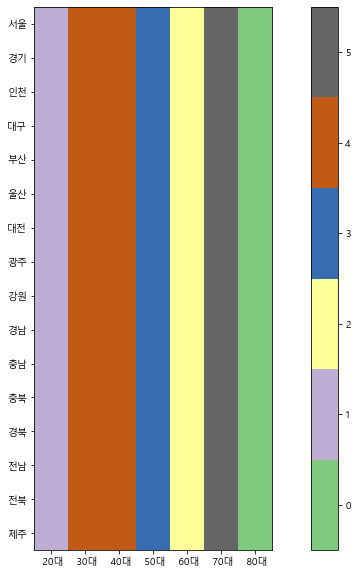

cluster                              
age      20대  30대  40대  50대  60대  70대  80대
city                                      
서울         1    4    4    3    2    5    0
경기         1    4    4    3    2    5    0
인천         1    4    4    3    2    5    0
대구         1    4    4    3    2    5    0
부산         1    4    4    3    2    5    0
울산         1    4    4    3    2    5    0
대전         1    4    4    3    2    5    0
광주         1    4    4    3    2    5    0
강원         1    4    4    3    2    5    0
경남         1    4    4    3    2    5    0
충남         1    4    4    3    2    5    0
충북         1    4    4    3    2    5    0
경북         1    4    4    3    2    5    0
전남         1    4    4    3    2    5    0
전북         1    4    4    3    2    5    0
제주         1    4    4    3    2    5    0

In [68]:
cluster_visualization(city_encoding_kmeans)

연령과의 상관관계가 너무 큰 것으로 보임

다른 변수들에 연령이 영향을 이미 미쳤을텐데, 연령 변수까지 추가해서 더욱 커진 것으로 생각됨

##### 2. 지역, 나이 제외 + 그룹화 X (city)

In [57]:
city_df = city.copy()
city_kmeans = k_means_clustering(city_df, cluster_num, scaler)
city_kmeans.groupby(['cluster'])['avg_score'].count()

cluster
0    642
1    419
2    496
3    384
4    310
5    437
Name: avg_score, dtype: int64

In [58]:
for city_age in city_kmeans['city_ages'].unique():
    print(city_age, city_kmeans[city_kmeans['city_ages']==city_age]['cluster'].unique())

서울 20대 [3]
인천 20대 [3]
대전 20대 [3]
대구 20대 [3]
광주 20대 [3]
부산 20대 [3]
울산 20대 [3]
경기 20대 [3]
강원 20대 [3]
충북 20대 [3]
충남 20대 [3]
전북 20대 [3]
전남 20대 [3]
경북 20대 [3]
경남 20대 [3]
제주 20대 [3]
서울 30대 [5 1]
인천 30대 [5]
대전 30대 [5]
대구 30대 [5 1]
광주 30대 [5]
부산 30대 [5 1]
울산 30대 [5 1]
경기 30대 [5 1]
강원 30대 [5]
충북 30대 [5]
충남 30대 [5]
전북 30대 [5]
전남 30대 [5]
경북 30대 [5]
경남 30대 [5]
제주 30대 [5]
서울 40대 [1]
인천 40대 [1]
대전 40대 [5 1]
대구 40대 [1]
광주 40대 [5 1]
부산 40대 [1]
울산 40대 [1]
경기 40대 [1]
강원 40대 [5]
충북 40대 [5 1]
충남 40대 [5 1]
전북 40대 [5]
전남 40대 [5]
경북 40대 [5]
경남 40대 [5 1]
제주 40대 [4]
서울 50대 [1]
인천 50대 [1]
대전 50대 [4 1]
대구 50대 [4 1]
광주 50대 [4]
부산 50대 [1 4]
울산 50대 [4 1]
경기 50대 [1]
강원 50대 [4]
충북 50대 [4]
충남 50대 [4]
전북 50대 [4]
전남 50대 [4]
경북 50대 [4]
경남 50대 [4]
제주 50대 [4]
서울 60대 [4 2]
인천 60대 [4 2]
대전 60대 [4 2]
대구 60대 [2]
광주 60대 [4 2]
부산 60대 [4 2]
울산 60대 [4 2]
경기 60대 [4 2]
강원 60대 [4 2]
충북 60대 [4 2]
충남 60대 [4 2]
전북 60대 [4 0 2]
전남 60대 [4 0 2]
경북 60대 [2 0]
경남 60대 [4 2]
제주 60대 [4 2]
서울 70대 [2]
인천 70대 [2 0]
대전 70대 [0]
대구 70대 [0]
광주 70대 [0]
부

##### 3. 지역, 나이 제외 + 그룹화 O (city_total)

In [59]:
city_total_df = city_total.copy()
city_total_kmeans = k_means_clustering(city_total_df, cluster_num, scaler)
city_total_kmeans.groupby(['cluster'])['total_avg_score'].count()

cluster
0    21
1    27
2    13
3    14
4    21
5    16
Name: total_avg_score, dtype: int64

In [60]:
for city_age in city_total_kmeans['city_ages'].unique():
    print(city_age, city_total_kmeans[city_total_kmeans['city_ages']==city_age]['cluster'].unique())

강원20대 [5]
강원30대 [0]
강원40대 [0]
강원50대 [2]
강원60대 [4]
강원70대 [1]
강원80대 [1]
경기20대 [5]
경기30대 [0]
경기40대 [3]
경기50대 [3]
경기60대 [4]
경기70대 [4]
경기80대 [4]
경남20대 [5]
경남30대 [0]
경남40대 [3]
경남50대 [2]
경남60대 [4]
경남70대 [1]
경남80대 [1]
경북20대 [5]
경북30대 [0]
경북40대 [0]
경북50대 [2]
경북60대 [4]
경북70대 [1]
경북80대 [1]
광주20대 [5]
광주30대 [0]
광주40대 [0]
광주50대 [2]
광주60대 [4]
광주70대 [1]
광주80대 [1]
대구20대 [5]
대구30대 [0]
대구40대 [3]
대구50대 [2]
대구60대 [4]
대구70대 [1]
대구80대 [1]
대전20대 [5]
대전30대 [0]
대전40대 [3]
대전50대 [2]
대전60대 [4]
대전70대 [1]
대전80대 [1]
부산20대 [5]
부산30대 [0]
부산40대 [3]
부산50대 [3]
부산60대 [4]
부산70대 [1]
부산80대 [1]
서울20대 [5]
서울30대 [3]
서울40대 [3]
서울50대 [3]
서울60대 [4]
서울70대 [4]
서울80대 [4]
울산20대 [5]
울산30대 [3]
울산40대 [3]
울산50대 [2]
울산60대 [4]
울산70대 [4]
울산80대 [1]
인천20대 [5]
인천30대 [0]
인천40대 [3]
인천50대 [3]
인천60대 [4]
인천70대 [1]
인천80대 [1]
전남20대 [5]
전남30대 [0]
전남40대 [0]
전남50대 [2]
전남60대 [1]
전남70대 [1]
전남80대 [1]
전북20대 [5]
전북30대 [0]
전북40대 [0]
전북50대 [2]
전북60대 [4]
전북70대 [1]
전북80대 [1]
제주20대 [5]
제주30대 [0]
제주40대 [2]
제주50대 [2]
제주60대 [4]
제주70대 [4]
제주80대 [1]
충남20대 [5]
충남30대 [0]


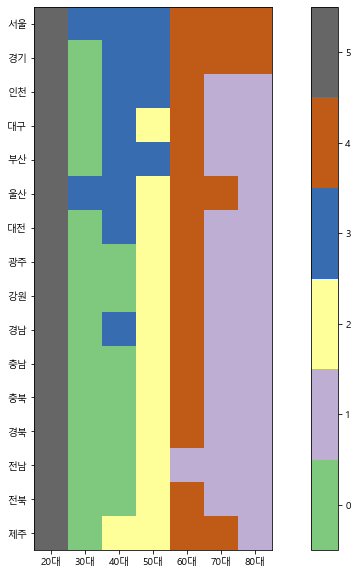

cluster                        
age      20대 30대 40대 50대 60대 70대 80대
city                                
서울         5   3   3   3   4   4   4
경기         5   0   3   3   4   4   4
인천         5   0   3   3   4   1   1
대구         5   0   3   2   4   1   1
부산         5   0   3   3   4   1   1
울산         5   3   3   2   4   4   1
대전         5   0   3   2   4   1   1
광주         5   0   0   2   4   1   1
강원         5   0   0   2   4   1   1
경남         5   0   3   2   4   1   1
충남         5   0   0   2   4   1   1
충북         5   0   0   2   4   1   1
경북         5   0   0   2   4   1   1
전남         5   0   0   2   1   1   1
전북         5   0   0   2   4   1   1
제주         5   0   2   2   4   4   1

In [69]:
cluster_visualization(city_total_kmeans)

##### 4. 성별, 도시, 나이 제외 (df_total)

In [70]:
df_total1 = df_total.copy()

df_total_kmeans = k_means_clustering(df_total1, cluster_num, StandardScaler())
df_total_kmeans.groupby(['cluster'])['avg_score'].count()

cluster
0    497
1    329
2    717
3    432
4    485
5    564
Name: avg_score, dtype: int64

In [71]:
df_total_kmeans.head()

,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_installments_payment,monthly_spend,cluster
0,740,1.99000,810000,18500000,620000,2110000,680000,1320000,3800000,10520000,9750000,14920000,35450000,83000,727000,3
1,782,1.75000,790000,24150000,680000,2300000,790000,1160000,5420000,12220000,12240000,19070000,42420000,83000,707000,3
2,782,1.74000,790000,24240000,680000,2300000,790000,1210000,5350000,12280000,12370000,19190000,42480000,78000,712000,3
3,782,1.75000,860000,24570000,680000,2300000,790000,1230000,5380000,12320000,12700000,19360000,42980000,89000,771000,3
4,781,1.75000,820000,24830000,700000,2320000,770000,1250000,5430000,12420000,12870000,19580000,43370000,82000,738000,3


In [73]:
df_total_kmeans = pd.concat([df_total_kmeans, tmp_df], axis=1)
df_total_kmeans

,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_installments_payment,monthly_spend,cluster,city,ages,sex
0,740,1.99000,810000,18500000,620000,2110000,680000,1320000,3800000,10520000,9750000,14920000,35450000,83000,727000,3,서울,20대,NaN
1,782,1.75000,790000,24150000,680000,2300000,790000,1160000,5420000,12220000,12240000,19070000,42420000,83000,707000,3,서울,20대,NaN
2,782,1.74000,790000,24240000,680000,2300000,790000,1210000,5350000,12280000,12370000,19190000,42480000,78000,712000,3,서울,20대,NaN
3,782,1.75000,860000,24570000,680000,2300000,790000,1230000,5380000,12320000,12700000,19360000,42980000,89000,771000,3,서울,20대,NaN
4,781,1.75000,820000,24830000,700000,2320000,770000,1250000,5430000,12420000,12870000,19580000,43370000,82000,738000,3,서울,20대,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,818,0.18000,200000,58460000,230000,260000,1610000,290000,8600000,18710000,41980000,14140000,84270000,43000,157000,2,NaN,80대,여자
3020,818,0.18000,190000,58330000,230000,270000,1610000,310000,8550000,18750000,41870000,14230000,84120000,39000,151000,2,NaN,80대,여자
3021,818,0.18000,210000,58190000,240000,290000,1610000,430000,8630000,18760000,41770000,14250000,84200000,49000,161000,2,NaN,80대,여자
3022,819,0.18000,200000,58420000,240000,300000,1610000,470000,8570000,18690000,42130000,14330000,84390000,44000,156000,2,NaN,80대,여자


In [74]:
df_total_kmeans.groupby('cluster').mean()

,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_installments_payment,monthly_spend
cluster,,,,,,,,,,,,,,,
0,792.32998,2.17781,1602736.41851,44150281.69014,1292374.24547,4725070.42254,2679919.51710,1133581.48893,10543360.16097,25924768.61167,24070523.13883,27319014.08451,78740482.89738,257752.51509,1344983.90342
1,795.90881,1.81401,1423069.90881,58841246.20061,1072826.74772,3784133.73860,2241458.96657,621306.99088,18585136.77812,22824650.45593,38323586.62614,28697264.43769,105045653.49544,283121.58055,1139948.32827
2,818.15760,0.47888,291729.42817,45579051.60391,207377.96374,550697.35007,915955.36960,145913.52859,13057099.02371,11718744.76987,32270655.50907,14383542.53835,73955732.21757,61518.82845,230210.59972
3,770.55787,1.78613,788888.88889,18667615.74074,699907.40741,3828472.22222,889537.03704,1611458.33333,3533055.55556,13209050.92593,11676527.77778,16360833.33333,38640555.55556,84115.74074,704773.14815
4,801.31959,2.14812,1700742.26804,63170164.94845,1551216.49485,4119154.63918,4172350.51546,1054886.59794,12483649.48454,37871731.95876,30950515.46392,29340969.07216,108520226.80412,300868.04124,1399874.22680
5,826.47518,1.14059,779237.58865,64239734.04255,732695.03546,1853812.05674,1868031.91489,347375.88652,17720372.34043,22261382.97872,40544858.15603,20367251.77305,109477712.76596,171420.21277,607817.37589


#### DBSCAN

필요인자

* 최대 탐색 거리 epsilon
* 최소 샘플 개수 min_samples 

밀도가 다양할 때 수행이 잘 안 되는 것이 단점

-> 고차원 데이터에서 단점이 부각

--> 우리 데이터는 고차원이기 때문에 문제가 될 것 같음

In [17]:
from sklearn.cluster import DBSCAN

In [44]:
e = 1
m = 2

dbscan = DBSCAN(eps = e, min_samples=m, metric = 'euclidean')
city_total_dbscan = scaler.fit_transform(city_total)
clusters_dbscan = dbscan.fit_predict(city_total_dbscan)

In [45]:
city_total_dbscan = pd.DataFrame(city_total_dbscan, columns=city_total.columns, index=city_total.index)
city_total_dbscan['cluster'] = clusters_dbscan
city_total_dbscan

,total_avg_score,total_num_usecard,total_monthly_card_spend,total_monthly_bk_loan,total_monthly_cd_loan,total_monthly_installments_loan,total_monthly_insurance_loan,total_monthly_sbk_loan,total_loan_commitment,total_inst_rep_loanb,total_ls_rep_loanb,total_credit_loan,total_mortgage_loan,total_credit_card_installments_payment,total_monthly_spend,cluster
city_ages,,,,,,,,,,,,,,,,
강원20대,-1.91144,0.39381,-0.38005,-1.97021,-0.54200,1.01785,-1.02602,1.64883,-1.72060,-0.98023,-1.85258,-0.93947,-2.05700,-0.93965,-0.25275,0
강원30대,-0.75324,0.99750,1.00607,-0.88116,0.53699,1.49914,-0.10833,0.94593,-0.66113,-0.14097,-1.01963,0.60313,-0.93497,0.68540,1.05898,1
강원40대,-1.06969,0.86539,1.30344,-0.38463,0.91257,1.51204,0.27668,0.45043,0.27015,0.06904,-0.47845,1.02057,-0.29916,1.27118,1.28909,2
강원50대,-0.78208,0.30610,0.65193,-0.00827,0.31395,0.81194,-0.24289,-0.26824,1.33194,-0.32851,0.01640,0.85179,0.16090,1.00114,0.56570,-1
강원60대,0.55390,-0.31572,-0.22713,-0.08468,-0.34569,-0.09290,-0.76827,-0.93828,1.52008,-0.71522,-0.09114,-0.21556,0.15209,0.13333,-0.30140,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
충북40대,-0.64822,0.82565,1.20836,-0.24769,0.96616,1.34938,1.65790,0.69983,0.35993,0.66023,-0.29059,0.73964,0.13306,0.99762,1.23418,-1
충북50대,-0.32441,0.31368,0.54087,-0.02534,0.34757,0.70786,0.43862,-0.14735,1.47685,0.01309,0.24951,0.54018,0.47270,0.74046,0.48883,-1
충북60대,0.83425,-0.36546,-0.33977,-0.14458,-0.32235,-0.30526,-0.44252,-0.76987,1.68844,-0.54858,0.07632,-0.42509,0.30879,-0.13230,-0.37910,3


In [20]:
city_total_dbscan.groupby(['cluster'])['total_avg_score'].count()

cluster
-1     56
 0     15
 1      2
 2      2
 3      3
 4      5
 5      7
 6      4
 7      2
 8      2
 9      2
 10     2
 11     2
 12     2
 13     2
 14     2
 15     2
Name: total_avg_score, dtype: int64

#### GMM(Gaussian Mixture Model)

- 타원형으로 길게 늘어진 데이터 분포에 적용이 용이
- 개별 가우시안 분포에 속한다고 가정을 한 상태에서 특정 정규분포에 속할 확률을 추정하는 것
- n_components : 사전적으로 정의하는 군집화 개수

##### 최적의 클러스터 개수 - GMM이 확률 생성 모델이기 때문에 AIC, BIC 방식 적용 가능
- AIC(Akaike Information Criterion)
- BIC(Bayesian information criterion)
- AIC, BIC가 작을수록 좋음
- AIC는 과적합될 수 있는 더 복잡한 모델을 선택하는 경향, BIC는 과소적합될 수 있는 더 단순한 모델을 선택하는 경향

In [103]:
def aic_bic(dataframe, n_components):
    gmm = [GaussianMixture(n, reg_covar = 1e-1, random_state=121).fit(dataframe)
        for n in n_components]

    plt.plot(n_components, [m.bic(dataframe) for m in gmm], 'bo-', label='BIC', color='red')
    plt.plot(n_components, [m.aic(dataframe) for m in gmm], 'bo-', label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components')

##### GMM 클러스터링 함수

In [ ]:
def gmm_clustering(dataframe, cluster_num, scaler):
    gmm = GaussianMixture(n_components = cluster_num, random_state=0)
    dataframe_gmm = scaler.fit_transform(dataframe)
    predict = gmm.fit_predict(dataframe_gmm)

    output_df = pd.DataFrame(dataframe, columns = dataframe.columns, index=dataframe.index)
    output_df['cluster'] = predict

    if 'city_ages' == dataframe.index.name:
        output_df.reset_index(inplace=True)
        output_df['city'] = output_df['city_ages'].str.slice(start=0, stop=2)
        output_df['age'] = output_df['city_ages'].str.slice(start=2, stop=6)
        
    return output_df

##### 1. city_total : 지역, 나이 제외 + 그룹화

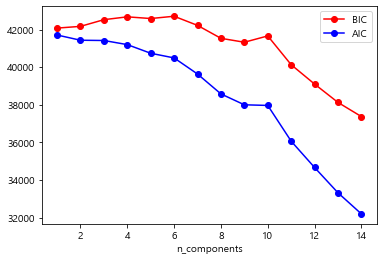

In [112]:
city_total2 = city_total.copy()

aic_bic(city_total2, np.arange(1, 15, 1))

In [113]:
n = 7
scaler = StandardScaler()
city_total2_gmm = gmm_clustering(city_total2, n, scaler)

In [114]:
city_total2_gmm.groupby('cluster').count()['total_avg_score']

cluster
0    15
1    24
2    16
3    22
4    17
5     6
6    12
Name: total_avg_score, dtype: int64

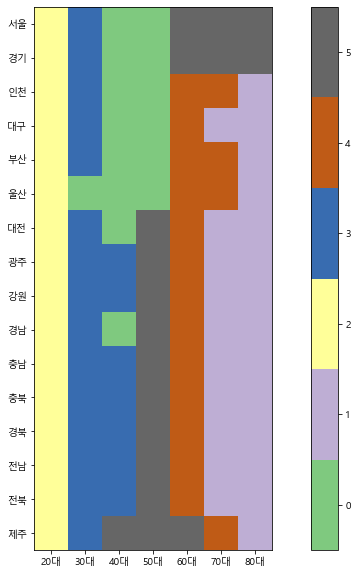

cluster                        
age      20대 30대 40대 50대 60대 70대 80대
city                                
서울         2   3   0   0   5   5   5
경기         2   3   0   0   5   5   5
인천         2   3   0   0   4   4   1
대구         2   3   0   0   4   1   1
부산         2   3   0   0   4   4   1
울산         2   0   0   0   4   4   1
대전         2   3   0   6   4   1   1
광주         2   3   3   6   4   1   1
강원         2   3   3   6   4   1   1
경남         2   3   0   6   4   1   1
충남         2   3   3   6   4   1   1
충북         2   3   3   6   4   1   1
경북         2   3   3   6   4   1   1
전남         2   3   3   6   4   1   1
전북         2   3   3   6   4   1   1
제주         2   3   6   6   6   4   1

In [115]:
cluster_visualization(city_total2_gmm)

##### 2. df_total : 성별, 지역, 나이 제외

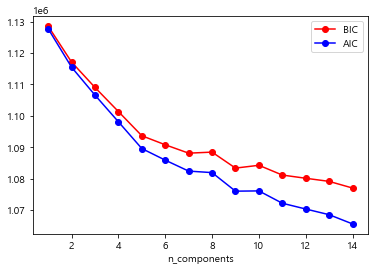

In [125]:
df_total2 = df_total.copy()

aic_bic(df_total2, np.arange(1, 15, 1))

In [126]:
n = 7
scaler = StandardScaler()
df_total2_gmm = gmm_clustering(df_total2, n, scaler)

In [127]:
df_total2_gmm =  pd.concat([df_total2_gmm, tmp_df, tmp_total_df], axis=1)
df_total2_gmm

,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,...,credit_card_installments_payment,monthly_spend,cluster,city,ages,sex,avg_rat,monthly_loan,credit_card_payment,debit_card_payment
0,740,1.99000,810000,18500000,620000,2110000,680000,1320000,3800000,10520000,...,83000,727000,2,서울,20대,NaN,4,24940000,254000,473000
1,782,1.75000,790000,24150000,680000,2300000,790000,1160000,5420000,12220000,...,83000,707000,2,서울,20대,NaN,4,30880000,278000,429000
2,782,1.74000,790000,24240000,680000,2300000,790000,1210000,5350000,12280000,...,78000,712000,2,서울,20대,NaN,4,31000000,267000,445000
3,782,1.75000,860000,24570000,680000,2300000,790000,1230000,5380000,12320000,...,89000,771000,2,서울,20대,NaN,4,31390000,292000,479000
4,781,1.75000,820000,24830000,700000,2320000,770000,1250000,5430000,12420000,...,82000,738000,2,서울,20대,NaN,4,31730000,285000,453000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,818,0.18000,200000,58460000,230000,260000,1610000,290000,8600000,18710000,...,43000,157000,0,NaN,80대,여자,3,69610000,82000,75000
3020,818,0.18000,190000,58330000,230000,270000,1610000,310000,8550000,18750000,...,39000,151000,0,NaN,80대,여자,3,69500000,82000,69000
3021,818,0.18000,210000,58190000,240000,290000,1610000,430000,8630000,18760000,...,49000,161000,0,NaN,80대,여자,3,69510000,87000,74000
3022,819,0.18000,200000,58420000,240000,300000,1610000,470000,8570000,18690000,...,44000,156000,0,NaN,80대,여자,3,69750000,80000,76000


In [128]:
df_total2_gmm.groupby('cluster')['avg_score'].count()

cluster
0    454
1    553
2    432
3    337
4    375
5    407
6    466
Name: avg_score, dtype: int64

In [129]:
df_total2_gmm.groupby('cluster').mean()

,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_installments_payment,monthly_spend,avg_rat,monthly_loan,credit_card_payment,debit_card_payment
cluster,,,,,,,,,,,,,,,,,,,
0,825.71586,0.52196,371519.82379,60881872.24670,291828.19383,616674.00881,1552863.43612,228656.38767,14235484.58150,17295704.84581,43131960.35242,16409647.57709,95174735.68282,80418.50220,291101.32159,2.99780,75079867.84141,187310.57269,103790.74890
1,793.69078,2.18490,1623508.13743,45346708.86076,1323273.05606,4749909.58409,2808010.84991,1167830.01808,10621916.81736,26858933.09222,24526112.11573,27582893.30922,80646618.44485,260956.60036,1362551.53707,3.11573,63906274.86438,907949.36709,454602.16998
2,770.55787,1.78613,788888.88889,18667615.74074,699907.40741,3828472.22222,889537.03704,1611458.33333,3533055.55556,13209050.92593,11676527.77778,16360833.33333,38640555.55556,84115.74074,704773.14815,4.00000,29305115.74074,255993.05556,448780.09259
3,796.64392,1.84567,1492967.35905,58922611.27596,1121038.57567,3940712.16617,2275816.02374,676468.84273,18503471.81009,23559406.52819,38218516.32047,29527833.82789,104908367.95252,289077.15134,1203890.20772,3.07715,81926320.47478,820216.61721,383673.59050
4,814.95467,0.44608,247653.33333,38578240.00000,142933.33333,496160.00000,455173.33333,110053.33333,13005626.66667,8770160.00000,26295520.00000,13231840.00000,64361200.00000,49413.33333,198240.00000,3.00000,48286266.66667,117557.33333,80682.66667
5,800.98280,2.12007,1657641.27764,64351769.04177,1539287.46929,3938378.37838,4293488.94349,986707.61671,12403292.38329,38489164.61916,31111621.62162,28839238.32924,110511400.49140,300560.19656,1357081.08108,3.10811,84173046.68305,932842.75184,424238.32924
6,822.25322,1.30968,860815.45064,59266845.49356,831330.47210,2162789.69957,1846223.17597,342296.13734,17741652.36052,21718476.39485,36566802.57511,20806309.01288,104771287.55365,190697.42489,670118.02575,2.99785,77261781.11588,463630.90129,206487.12446


In [16]:
#clustering = df_total2_gmm.to_csv('dataset/gmm_clustering.csv', encoding='utf-8', index=False)